In [1]:
!pip -q install qiskit qiskit-terra[visualization] matplotlib ipywidgets pylatexenc

In [2]:
from qiskit import Aer, BasicAer, assemble, execute, pulse, \
                   QuantumCircuit, schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.test import mock
from qiskit.pulse.library import Gaussian
from qiskit.visualization import plot_histogram, \
                                 plot_bloch_multivector
from qiskit.visualization.pulse_v2 import draw
import qiskit.tools.jupyter

# fake quantum computers we're using
backend = mock.FakeArmonk()

backend_sim = Aer.get_backend('qasm_simulator')
backend_vec = BasicAer.get_backend('statevector_simulator')

## First, let's create phase

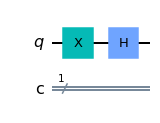

In [3]:
qc = QuantumCircuit(1, 1)

# put qubit in |1>
qc.x(0)
# append one hadamard gate (|->)
qc.h(0)

qc.draw('mpl')

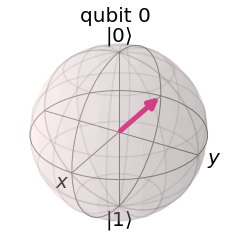

In [4]:
job = execute(qc, backend_vec).result()
plot_bloch_multivector(job.get_statevector(qc)) # plot qubit statevectors

# Does phase appear in measurements?

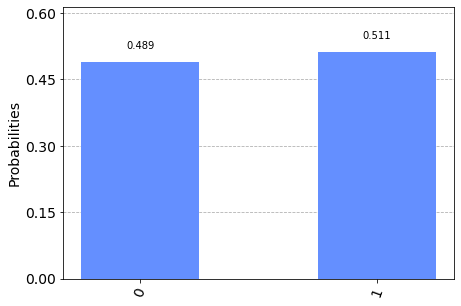

In [5]:
qc.measure(0, 0)

job_sim = execute(qc, backend_sim, shots=1000).result()
counts = job_sim.get_counts(qc) # run quantum simulation

plot_histogram(counts)

## Let's now look at intereference

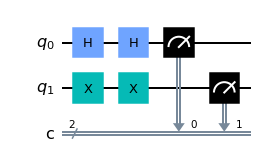

In [6]:
qc = QuantumCircuit(2, 2)

# append two hadamard gates
qc.h(0)
qc.h(0)

qc.x(1)
qc.x(1)

qc.measure([0, 1], [0, 1])

qc.draw('mpl')

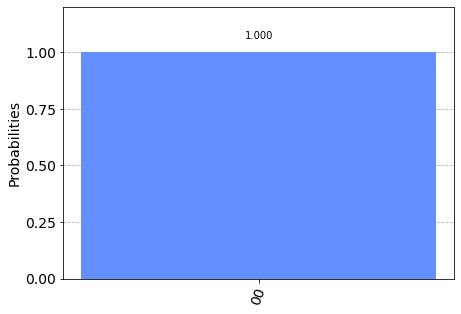

In [7]:
job_sim = execute(qc, backend_sim, shots=1000).result()
counts = job_sim.get_counts(qc) # run quantum simulation

plot_histogram(counts)

https://slc.is/#Custom%20Gates%20in%20Qiskit%20with%20Pulse